# Netflix Titles Analysis

**Course:** CS4379
**Student:** Ikram Yahya

## Problem Statement
In this notebook, I analyze the Netflix titles dataset to understand how the number of titles added to Netflix has changed over time and to explore the distribution of release years in the catalog.

## Research Question
How has the number of titles added to Netflix changed over time?


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [10]:
from pathlib import Path
import pandas as pd

CSV_PATH = Path("..") / "data" / "netflix_titles.csv"

df = pd.read_csv(CSV_PATH)
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Overview

The Netflix titles dataset contains information about movies and TV shows available on Netflix.
Each row represents a single title, and columns describe attributes such as type, release year,
rating, duration, and country of production.


In [11]:
df.shape


(8807, 12)

In [12]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   str  
 1   type          8807 non-null   str  
 2   title         8807 non-null   str  
 3   director      6173 non-null   str  
 4   cast          7982 non-null   str  
 5   country       7976 non-null   str  
 6   date_added    8797 non-null   str  
 7   release_year  8807 non-null   int64
 8   rating        8803 non-null   str  
 9   duration      8804 non-null   str  
 10  listed_in     8807 non-null   str  
 11  description   8807 non-null   str  
dtypes: int64(1), str(11)
memory usage: 825.8 KB


In [13]:
df.isna().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [15]:
df['date_added'].head()


0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[us]

In [16]:
df['year_added'] = df['date_added'].dt.year


In [17]:
df[['date_added', 'year_added']].head()


,date_added,year_added
0,2021-09-25,2021.0
1,2021-09-24,2021.0
2,2021-09-24,2021.0
3,2021-09-24,2021.0
4,2021-09-24,2021.0


In [18]:
titles_per_year = df['year_added'].value_counts().sort_index()
titles_per_year


year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64

In [19]:
titles_per_year = df['year_added'].value_counts().sort_index()
titles_per_year


year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64

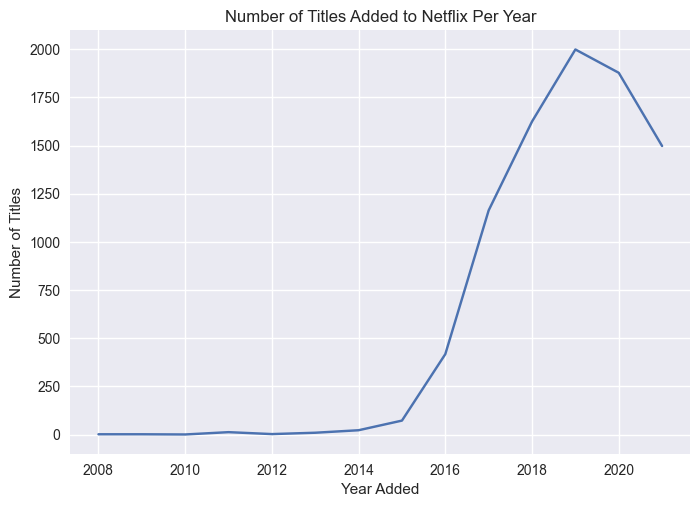

In [20]:
plt.figure()
titles_per_year.plot()
plt.title("Number of Titles Added to Netflix Per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


The distribution shows that most titles were released after the year 2000. There are fewer older titles compared to more recent ones. This indicates that Netflix's catalog mainly focuses on modern content rather than older films or shows.


In [25]:
def count_titles_per_year(data):
    yearly_counts = data['year_added'].value_counts().sort_index()
    return yearly_counts


In [26]:
titles_per_year = count_titles_per_year(df)
titles_per_year.head()


year_added
2008.0     2
2009.0     2
2010.0     1
2011.0    13
2012.0     3
Name: count, dtype: int64